# Demonstration notebook:  Plotting the average energies in fort.36 versus pH


## Data in fort.36:

## Fort.36 holds the following data, as given with the head command:

  ### > head fort.36

    pH =   4.50 Eh =   0.00, Unf. Energy =  -678.01 Kcal/mol :: Unf = unfolding energy
    pH =   4.50 Eh =   0.00, Ave. Energy = -4027.99 Kcal/mol :: the line we want
    pH =   4.50 Eh =   0.00, Min. Energy = -4062.44 Kcal/mol
      6.00 ARG01A0017_001 occ=0.000 trial=    2518/44340000 t
      6.00 ARG01A0017_002 occ=0.000 trial=    2452/44340000 t
      6.00 ARG01A0017_003 occ=0.000 trial=    2452/44340000 t
      6.00 ARG01A0017_006 occ=0.000 trial=    2494/44340000 t
      

### Where

$$
  Unf. = \sum_{i=1}^{k} n_i\times\Delta G_{i, free} - \sum_{k=1}^{n} \Delta G_{k, prot}
$$

### For example, for a deca-Alanine peptide, the unfolding energy would be estimated by:

$$
  Unf ( decaAla ) = \sum_{i=1}^{10} \Delta G(Ala)_{free} - \sum_{seq=1}^{10} \Delta G(ALAseq)
$$

In [1]:
import pandas as pd

in_file="fort.36";
# The input file, fort.36, is assumed to reside in the same folder as the notebook;
    
# Read the file into a dataframe;
# Identify the columns neededGet 'Ave' pH values & energy values columns from fort.36;   
try:
    df = pd.read_csv( in_file, sep="\s+", header=None, usecols=[2, 6, 9], names=['pH', 'E_type', 'E'] )

except:
    print ( "Could not read the input file: " + in_file )

# Use the head() function to inpect the output    
# df.head()  

### Filter by the average value we want to use (equivalent to grep):

In [2]:
AverE_df = df[ df['E_type']=='Ave.' ]

#AverE_df.head()

### Using groupby to obtain the mean directly:

In [3]:
AverE_df_by_pH = AverE_df.groupby(['pH'], sort=False).mean().E

AverE_df_by_pH

pH
0.00    -15.315000
1.00    -13.962500
2.00    -12.567500
3.00    -11.148000
4.00     -9.973750
5.00     -9.068182
6.00     -8.912500
7.00     -8.950000
8.00     -8.963333
9.00     -8.964286
10.00    -8.957500
11.00    -8.961111
12.00    -8.958571
13.00    -8.963846
14.00    -8.965000
Name: E, dtype: float64

In [16]:
# The Groupby field is now an index and can be referenced explicitely:
AverE_df_by_pH.index

# It will define the x-axis in the plot function.

Index(['0.00', '1.00', '2.00', '3.00', '4.00', '5.00', '6.00', '7.00', '8.00',
       '9.00', '10.00', '11.00', '12.00', '13.00', '14.00'],
      dtype='object', name='pH')

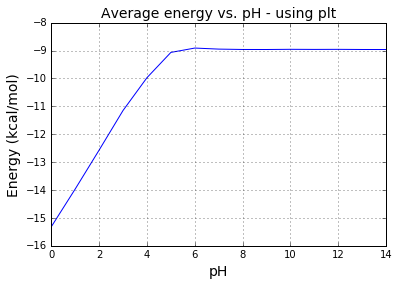

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot( AverE_df_by_pH.index, AverE_df_by_pH)
plt.title('Average energy vs. pH - using plt' , fontsize=14)
plt.xlabel('pH', fontsize=14)
plt.ylabel('Energy (kcal/mol)', fontsize=14)
plt.grid(True)
plt.show()

### Alternate way to obtain the stats: the "agg" function:

In [18]:
AverE_df_by_pH = AverE_df.groupby(['pH'], sort=False).agg( {"E": {"mean": np.mean, "std": np.std}} )
AverE_df_by_pH


E          
            mean       std
pH                        
0.00  -15.315000  0.005774
1.00  -13.962500  0.009574
2.00  -12.567500  0.005000
3.00  -11.148000  0.008367
4.00   -9.973750  0.428050
5.00   -9.068182  0.022724
6.00   -8.912500  0.015811
7.00   -8.950000  0.000000
8.00   -8.963333  0.008165
9.00   -8.964286  0.005345
10.00  -8.957500  0.005000
11.00  -8.961111  0.006009
12.00  -8.958571  0.003780
13.00  -8.963846  0.005064
14.00  -8.965000  0.005774

### Ploting the output: the std is a new series

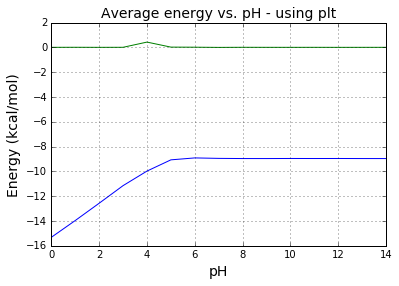

In [19]:
plt.plot( AverE_df_by_pH.index, AverE_df_by_pH['E'])
plt.title('Average energy vs. pH - using plt' , fontsize=14)
plt.xlabel('pH', fontsize=14)
plt.ylabel('Energy (kcal/mol)', fontsize=14)
plt.grid(True)
plt.show()

### To do: Use std as error bars